# Analysisand cleaning data 

In [10]:
import numpy as np
import pandas as pd 
from numpy.ma.core import zeros 
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier#import Decision Tree Classefier
from sklearn.model_selection import train_test_split#import train_test_split function
from sklearn import metrics #import skitlearn metrices module for accuracy caclulation
from sklearn.ensemble import RandomForestRegressor #import Random Forest regrassion classifier
from sklearn.ensemble import RandomForestClassifier  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB 


In [11]:
df=pd.read_csv("gift_Rec.csv")

In [12]:
df.head(30)

,Age,Gender,Job,Income,Relation,Event,Gift
0,20.0,Male,خريج,0.0,Wife,Valantine,chocolate cake with dimond ring
1,20.0,Female,Student,0.0,Wife,Valantine,chocolate cake with dimond ring
2,20.0,Male,Student,0.0,Wife,Valantine,chocolate cake with dimond ring
3,15.0,Male,Student,0.0,Wife,Valantine,NaN
4,20.0,Male,Student,0.0,Wife,Valantine,Luna Sapphire And Diamond Eternity Ring In 14k...
5,20.0,Male,police officer,5000.0,Wife,Valantine,chocolate cake with dimond ring
6,20.0,Male,Engineer,10000.0,Wife,Valantine,Oval Sapphire And Diamond Cluster Pendant In 1...
7,25.0,Male,Engineer,15000.0,Wife,Valantine,V Chocolate Artisan Tower
8,20.0,Male,gym trainer,5000.0,Wife,Valantine,chocolate cake with dimond ring
9,20.0,Female,Designer,0.0,Wife,Valantine,chocolate cake with dimond ring


In [4]:
df.tail(30)

,Age,Gender,Job,Income,Relation,Event,Gift
3465,30.0,Female,Doctor,21000.0,Husband,eid_marraige,Massage therapy
3466,25.0,Female,Teacher,9000.0,Husband,eid_marraige,Restaurant Gift Cards
3467,25.0,Female,Engineer,75000.0,Husband,eid_marraige,Weekend getaways
3468,25.0,Female,Teacher,21000.0,Husband,eid_marraige,Weekend getaways
3469,25.0,Female,Student,80000.0,Husband,eid_marraige,Weekend getaways
3470,33.0,Male,Prefer not to say,21000.0,Husband,eid_marraige,Restaurant Gift Cards
3471,25.0,Female,Doctor,9000.0,Husband,eid_marraige,Restaurant Gift Cards
3472,41.0,Female,Teacher,10000.0,Husband,eid_marraige,Weekend getaways
3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,30.0,Female,NaN,9000.0,Husband,eid_marraige,Weekend getaways


In [13]:
(df[['Age', 'Income','Gender','Job' ]] == 0 ).sum()

Age         0
Income    829
Gender      0
Job         0
dtype: int64

In [14]:
df.replace(0, np.nan, inplace=True)

In [7]:
column_to_clean = 'Income'  
df = df.loc[df[column_to_clean].notna()]
df[column_to_clean].replace(0, 9800, inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.head(30)

,Age,Gender,Job,Income,Relation,Event,Gift
0,20.0,Male,خريج,NaN,Wife,Valantine,chocolate cake with dimond ring
1,20.0,Female,Student,NaN,Wife,Valantine,chocolate cake with dimond ring
2,20.0,Male,Student,NaN,Wife,Valantine,chocolate cake with dimond ring
3,15.0,Male,Student,NaN,Wife,Valantine,NaN
4,20.0,Male,Student,NaN,Wife,Valantine,Luna Sapphire And Diamond Eternity Ring In 14k...
5,20.0,Male,police officer,5000.0,Wife,Valantine,chocolate cake with dimond ring
6,20.0,Male,Engineer,10000.0,Wife,Valantine,Oval Sapphire And Diamond Cluster Pendant In 1...
7,25.0,Male,Engineer,15000.0,Wife,Valantine,V Chocolate Artisan Tower
8,20.0,Male,gym trainer,5000.0,Wife,Valantine,chocolate cake with dimond ring
9,20.0,Female,Designer,NaN,Wife,Valantine,chocolate cake with dimond ring


In [794]:
df.isnull().sum()

Age         34
Gender       0
Job         34
Income       0
Relation    46
Event        0
Gift        30
dtype: int64

In [795]:
top_Event = df.Event.value_counts().head(17)
top_Event

Event
Birthday        867
Christmas       769
Valantine       195
eid_marraige    138
mo_day           94
fa_day           53
Thanksgiving     48
eid_feter        48
baptisms         46
retirement       46
new_job          46
new_year         45
weddings         44
eid_adha         44
ramadan          44
easter           44
bridershower     43
Name: count, dtype: int64

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [18]:
df["Income"].fillna(df["Income"].mode()[0], inplace=True)

In [19]:
df['Job'].fillna(df['Job'].mode()[0], inplace=True)

In [20]:
df['Relation'].fillna(df['Relation'].mode()[0], inplace=True)

In [21]:
df['Gift'].fillna(df['Gift'].mode()[0], inplace=True)

In [22]:
df['Event'].fillna(df['Event'].mode()[0], inplace=True)

In [23]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [24]:
df.head(300)

,Age,Gender,Job,Income,Relation,Event,Gift
0,20.0,Male,خريج,5000.0,Wife,Valantine,chocolate cake with dimond ring
1,20.0,Female,Student,5000.0,Wife,Valantine,chocolate cake with dimond ring
2,20.0,Male,Student,5000.0,Wife,Valantine,chocolate cake with dimond ring
3,15.0,Male,Student,5000.0,Wife,Valantine,Movie tickets
4,20.0,Male,Student,5000.0,Wife,Valantine,Luna Sapphire And Diamond Eternity Ring In 14k...
...,...,...,...,...,...,...,...
295,25.0,Male,Engineer,15000.0,Wife,Christmas,Chocolate Christmas Woman
296,25.0,Female,Teacher,5000.0,Wife,Christmas,Build Your Own Peacock Butterfly Wall Decoration
297,20.0,Female,Student,5000.0,Wife,Christmas,christmas hat socks
298,30.0,Female,house wife,5000.0,Wife,Christmas,Chocolate Christmas Woman


In [25]:
df.tail(30)

,Age,Gender,Job,Income,Relation,Event,Gift
3465,30.000000,Female,Doctor,21000.0,Husband,eid_marraige,Massage therapy
3466,25.000000,Female,Teacher,9000.0,Husband,eid_marraige,Restaurant Gift Cards
3467,25.000000,Female,Engineer,75000.0,Husband,eid_marraige,Weekend getaways
3468,25.000000,Female,Teacher,21000.0,Husband,eid_marraige,Weekend getaways
3469,25.000000,Female,Student,80000.0,Husband,eid_marraige,Weekend getaways
3470,33.000000,Male,Prefer not to say,21000.0,Husband,eid_marraige,Restaurant Gift Cards
3471,25.000000,Female,Doctor,9000.0,Husband,eid_marraige,Restaurant Gift Cards
3472,41.000000,Female,Teacher,10000.0,Husband,eid_marraige,Weekend getaways
3473,27.983363,Male,Engineer,5000.0,Wife,Birthday,Movie tickets
3474,30.000000,Female,Engineer,9000.0,Husband,eid_marraige,Weekend getaways


In [26]:
#to save the new data set 
#path_to_save = r'C:\Users\nour2\gift_Rec_final_05-03-2024.csv'
#df.to_csv(path_to_save, index=False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       3495 non-null   float64
 1   Gender    3495 non-null   object 
 2   Job       3495 non-null   object 
 3   Income    3495 non-null   float64
 4   Relation  3495 non-null   object 
 5   Event     3495 non-null   object 
 6   Gift      3495 non-null   object 
dtypes: float64(2), object(5)
memory usage: 191.3+ KB


In [28]:
df.isnull().sum()

Age         0
Gender      0
Job         0
Income      0
Relation    0
Event       0
Gift        0
dtype: int64

In [29]:
df.dtypes

Age         float64
Gender       object
Job          object
Income      float64
Relation     object
Event        object
Gift         object
dtype: object

In [30]:
df.head(30)

,Age,Gender,Job,Income,Relation,Event,Gift
0,20.0,Male,خريج,5000.0,Wife,Valantine,chocolate cake with dimond ring
1,20.0,Female,Student,5000.0,Wife,Valantine,chocolate cake with dimond ring
2,20.0,Male,Student,5000.0,Wife,Valantine,chocolate cake with dimond ring
3,15.0,Male,Student,5000.0,Wife,Valantine,Movie tickets
4,20.0,Male,Student,5000.0,Wife,Valantine,Luna Sapphire And Diamond Eternity Ring In 14k...
5,20.0,Male,police officer,5000.0,Wife,Valantine,chocolate cake with dimond ring
6,20.0,Male,Engineer,10000.0,Wife,Valantine,Oval Sapphire And Diamond Cluster Pendant In 1...
7,25.0,Male,Engineer,15000.0,Wife,Valantine,V Chocolate Artisan Tower
8,20.0,Male,gym trainer,5000.0,Wife,Valantine,chocolate cake with dimond ring
9,20.0,Female,Designer,5000.0,Wife,Valantine,chocolate cake with dimond ring


In [31]:
df.tail(30)

,Age,Gender,Job,Income,Relation,Event,Gift
3465,30.000000,Female,Doctor,21000.0,Husband,eid_marraige,Massage therapy
3466,25.000000,Female,Teacher,9000.0,Husband,eid_marraige,Restaurant Gift Cards
3467,25.000000,Female,Engineer,75000.0,Husband,eid_marraige,Weekend getaways
3468,25.000000,Female,Teacher,21000.0,Husband,eid_marraige,Weekend getaways
3469,25.000000,Female,Student,80000.0,Husband,eid_marraige,Weekend getaways
3470,33.000000,Male,Prefer not to say,21000.0,Husband,eid_marraige,Restaurant Gift Cards
3471,25.000000,Female,Doctor,9000.0,Husband,eid_marraige,Restaurant Gift Cards
3472,41.000000,Female,Teacher,10000.0,Husband,eid_marraige,Weekend getaways
3473,27.983363,Male,Engineer,5000.0,Wife,Birthday,Movie tickets
3474,30.000000,Female,Engineer,9000.0,Husband,eid_marraige,Weekend getaways


In [32]:
print(df["Gift"].dtype)

object


In [33]:
print(df["Gift"].isnull().sum())

0


In [34]:
print(df["Gift"].isnull().sum())
print(df["Gender"].isnull().sum())
print(df["Job"].isnull().sum())
print(df["Relation"].isnull().sum())
print(df["Event"].isnull().sum())

0
0
0
0
0


In [35]:
df.dtypes

Age         float64
Gender       object
Job          object
Income      float64
Relation     object
Event        object
Gift         object
dtype: object

In [36]:
#count the number of NAN values in eache column
df.isnull().sum()

Age         0
Gender      0
Job         0
Income      0
Relation    0
Event       0
Gift        0
dtype: int64

In [37]:
#count of the number of missing values on each of these columns
(df[['Age','Gender','Income','Relation','Event']] ==0) .sum()

Age         0
Gender      0
Income      0
Relation    0
Event       0
dtype: int64

In [38]:
df.count()

Age         3495
Gender      3495
Job         3495
Income      3495
Relation    3495
Event       3495
Gift        3495
dtype: int64

In [39]:
df.dtypes

Age         float64
Gender       object
Job          object
Income      float64
Relation     object
Event        object
Gift         object
dtype: object

In [40]:
df.isnull().sum()

Age         0
Gender      0
Job         0
Income      0
Relation    0
Event       0
Gift        0
dtype: int64

In [41]:
df.shape

(3495, 7)

# statistics

In [42]:
mean_income = df['Income'].mean()
print ("Mean_Income:", mean_income)
median_income = df['Income'].median()
print ("Median_Income:", median_income)

Mean_Income: 11073.208011444922
Median_Income: 5000.0


In [43]:
mean_Age = df['Age'].mean()
print ("Mean_Income:", mean_Age)
median_Age = df['Age'].median()
print ("Median_Age:", median_Age)

Mean_Income: 27.98336252189142
Median_Age: 25.0


In [44]:
mode_Relation = df['Relation'].mode()
print ("Mode_Relation:", mode_Relation)

Mode_Relation: 0    Wife
Name: Relation, dtype: object


In [45]:
mode_Job = df['Job'].mode()
print ("Mode_Job:", mode_Job)

Mode_Job: 0    Engineer
Name: Job, dtype: object


In [46]:
mode_Event = df['Event'].mode()
print ("Mode_Event:", mode_Event)

Mode_Event: 0    Birthday
Name: Event, dtype: object


In [47]:
mode_Gender = df['Gender'].mode()
print ("Mode_Gender:", mode_Gender)

Mode_Gender: 0    Male
Name: Gender, dtype: object


In [48]:
mode_Gift = df['Gift'].mode()
print ("Mode_Gift:", mode_Gift)

Mode_Gift: 0    Movie tickets
Name: Gift, dtype: object


In [49]:
top_Event = df.Event.value_counts().head(15)
top_Event

Event
Birthday        1311
Christmas       1103
Valantine        281
eid_marraige     141
mo_day            96
fa_day            54
Thanksgiving      49
eid_feter         49
baptisms          47
retirement        47
new_job           47
new_year          46
weddings          45
eid_adha          45
ramadan           45
Name: count, dtype: int64

In [50]:
top_Gift = df.Gift.value_counts().head(40)
top_Gift

Gift
Movie tickets                                                  175
Weekend getaways                                                62
Versace Eros Cologne                                            56
Blue Nile 14kt White Gold French Pavé Diamond Hoop Earrings     56
Personalized 5 Slot Watch Box                                   52
Redflower with Belgian chocolate                                51
Preserved Real Red Rose with Heart Crystal Necklace Gift        48
Black and White Photo Album Photo Book                          48
White Gaming Desk with LED Lights                               47
Brandon Blackwood Nia Bag                                       46
unicorn baket of sweets                                         46
Gallery of Three Keepsake Puzzle                                46
Thank You for Being a Friend Golden Girls Book                  45
chocolate cake with dimond ring                                 45
Personalized LOVE Photos                                 

In [51]:
top_Gender = df.Gender.value_counts().head(15)
top_Gender

Gender
Male      1968
Female    1527
Name: count, dtype: int64

In [52]:
top_Job = df.Job.value_counts().head(15)
top_Job

Job
Engineer        795
Student         681
Teacher         658
Doctor          542
housewife       143
Singer           38
gym trainer      38
driver           38
Sales            19
TA assistant     19
model            19
vloger           19
خريج             19
Secretary        19
banker           19
Name: count, dtype: int64

In [53]:
top_Age = df.Age.head(15)
top_Age

0     20.0
1     20.0
2     20.0
3     15.0
4     20.0
5     20.0
6     20.0
7     25.0
8     20.0
9     20.0
10    35.0
11    35.0
12    25.0
13    20.0
14    30.0
Name: Age, dtype: float64

In [54]:
top_Income = df.Income.value_counts().head(15)
top_Income

Income
5000.0     1637
20000.0     475
10000.0     437
15000.0     314
32767.0      76
2000.0       61
4500.0       60
7000.0       55
9000.0       50
25000.0      47
21000.0      45
6000.0       41
16000.0      29
50000.0      20
30000.0      19
Name: count, dtype: int64

In [55]:
top_Relation = df.Relation.value_counts().head(15)
top_Relation

Relation
Wife        672
Husband     467
Mother      281
Kids        281
Friend      279
any         277
Sister      271
brother     270
Father      268
Any         185
Son          98
Daughtor     52
friend       47
wife         47
Name: count, dtype: int64

# Visualize the information  

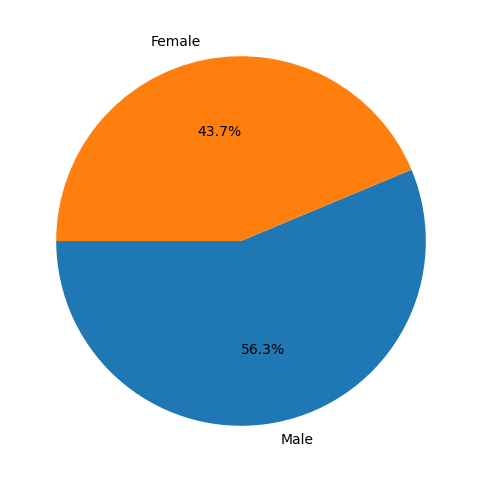

In [56]:
#for Gender we can use piechart 
plt.figure(figsize=(12,6))
plt.pie(top_Gender, labels=top_Gender.index, autopct='%1.1f%%', startangle=180);

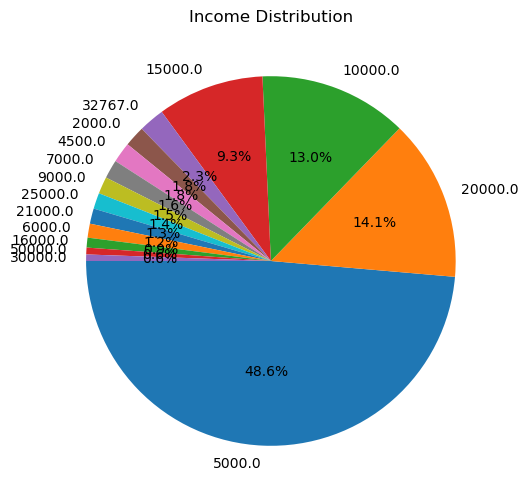

In [57]:
#for Gender we can use piechart 
plt.figure(figsize=(12,6))
plt.title("Income Distribution")
plt.pie(top_Income, labels=top_Income.index, autopct='%1.1f%%', startangle=180);

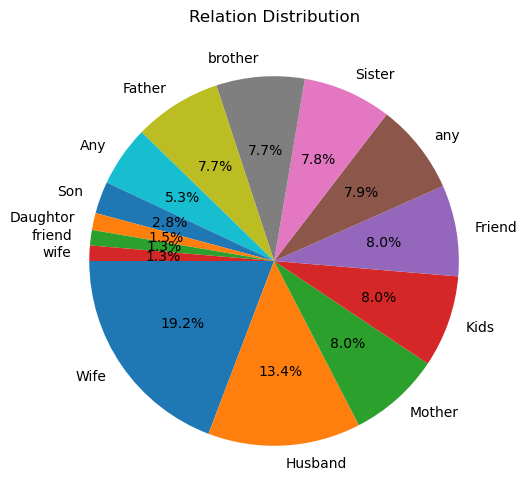

In [58]:
plt.figure(figsize=(12,6))
plt.title("Relation Distribution")
plt.pie(top_Relation, labels=top_Relation.index, autopct='%1.1f%%', startangle=180);

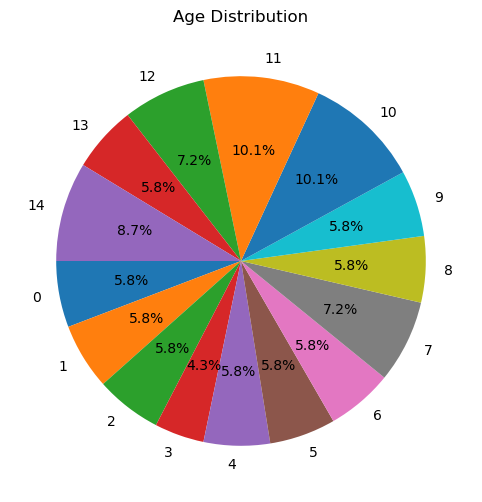

In [59]:
plt.figure(figsize=(12,6))
plt.title("Age Distribution")
plt.pie(top_Age, labels=top_Age.index, autopct='%1.1f%%', startangle=180);

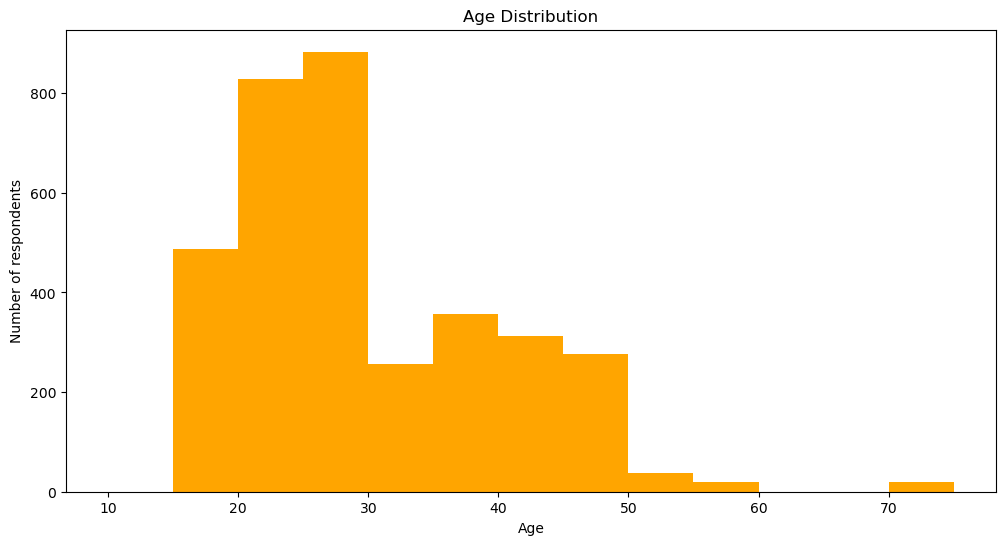

In [60]:
#for age we can use histogram to visualize it 
plt.figure(figsize=(12, 6))
plt.title("Age Distribution" )
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(df.Age, bins=np.arange(10,80,5), color='orange');

# plt boxplt 

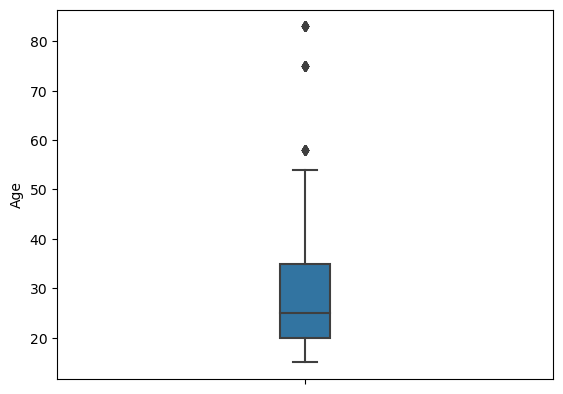

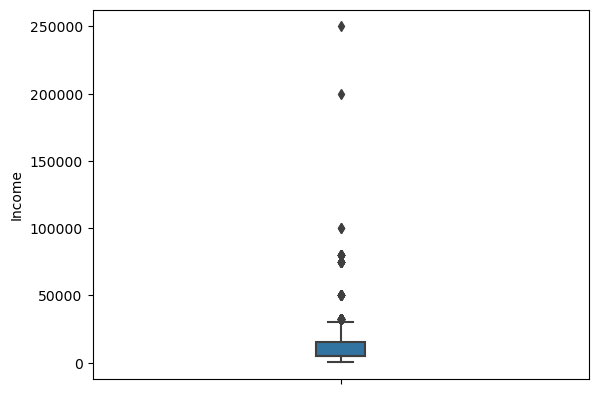

In [61]:
# boxplt for numerical value 
sns.boxplot(y= 'Age' ,data=df, width=0.1)
plt.show()
sns.boxplot(y= 'Income' ,data=df, width=0.1)
plt.show()

# Distributaion Plt

C:\Users\nour2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


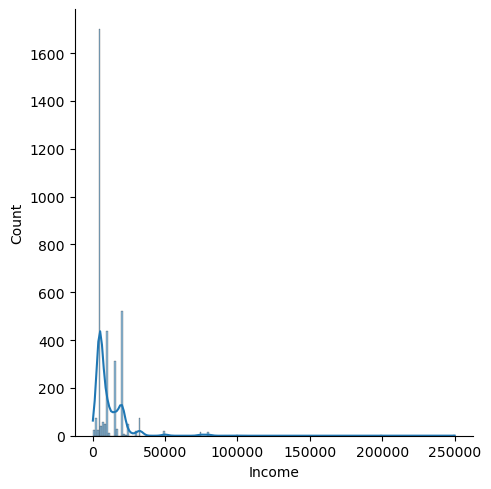

C:\Users\nour2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


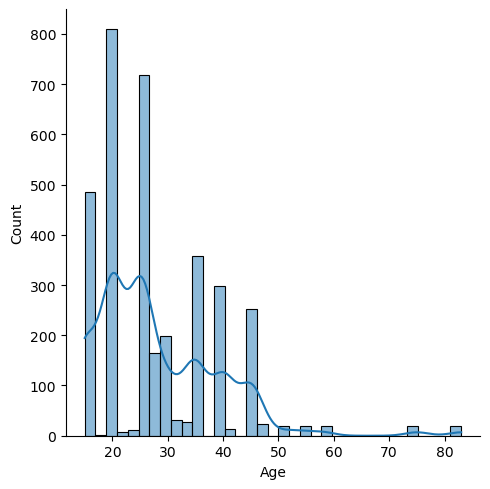

In [62]:
sns.displot(df['Income'] , kde=True)
plt.show()
sns.displot(df['Age'] , kde=True)
plt.show()

# Label Encoder

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder() 

In [65]:
df.Gender = le.fit_transform(df.Gender)

In [66]:
df.Gender = le.fit_transform(df.Income)

In [67]:
df.Job = le.fit_transform(df.Job)

In [68]:
df.Relation = le.fit_transform(df.Relation)

In [69]:
df.Event = le.fit_transform(df.Event)

In [70]:
df.Gift = le.fit_transform(df.Gift)

# spliting and train data 

In [850]:
#spliting data set to create model 
feature_col = ['Age','Gender','Job','Income','Relation','Event']
x=df[['Age','Gender','Job','Income','Relation','Event']]
y=df['Gift']
#print(x)
print(y)

0       145
1        87
2       124
3       145
4       145
       ... 
2609     82
2610      7
2611     82
2612    130
2613    105
Name: Gift, Length: 2614, dtype: int32


In [1129]:
#split dataset into trainnig set ans test set
X_train ,X_test, y_train ,y_test =train_test_split(x, y, test_size=0.50, random_state=1500)


 # Decision Tree Classifier

In [1130]:
#creating decision tree clf object
clf=DecisionTreeClassifier( criterion="entropy" , max_depth=5)

#feed model--> to train the decision tree classefier 
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [1131]:
y_pred = clf.predict(X_test)
y_pred

array([77, 61, 77, ..., 94, 91, 63])

In [1132]:
y_test.head(30)

911      77
1697     61
955     123
1559     85
384      94
73      145
690      45
2546     63
2594    130
2059    117
1730     75
1123     72
2549     82
1122     72
1608      8
2130    118
95       79
1604     78
1206     60
183     175
2213    108
1439    102
968     144
2564     66
1338     18
1679     75
2374     81
355      94
346       1
957      77
Name: Gift, dtype: int32

In [1133]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 27.31446059678653


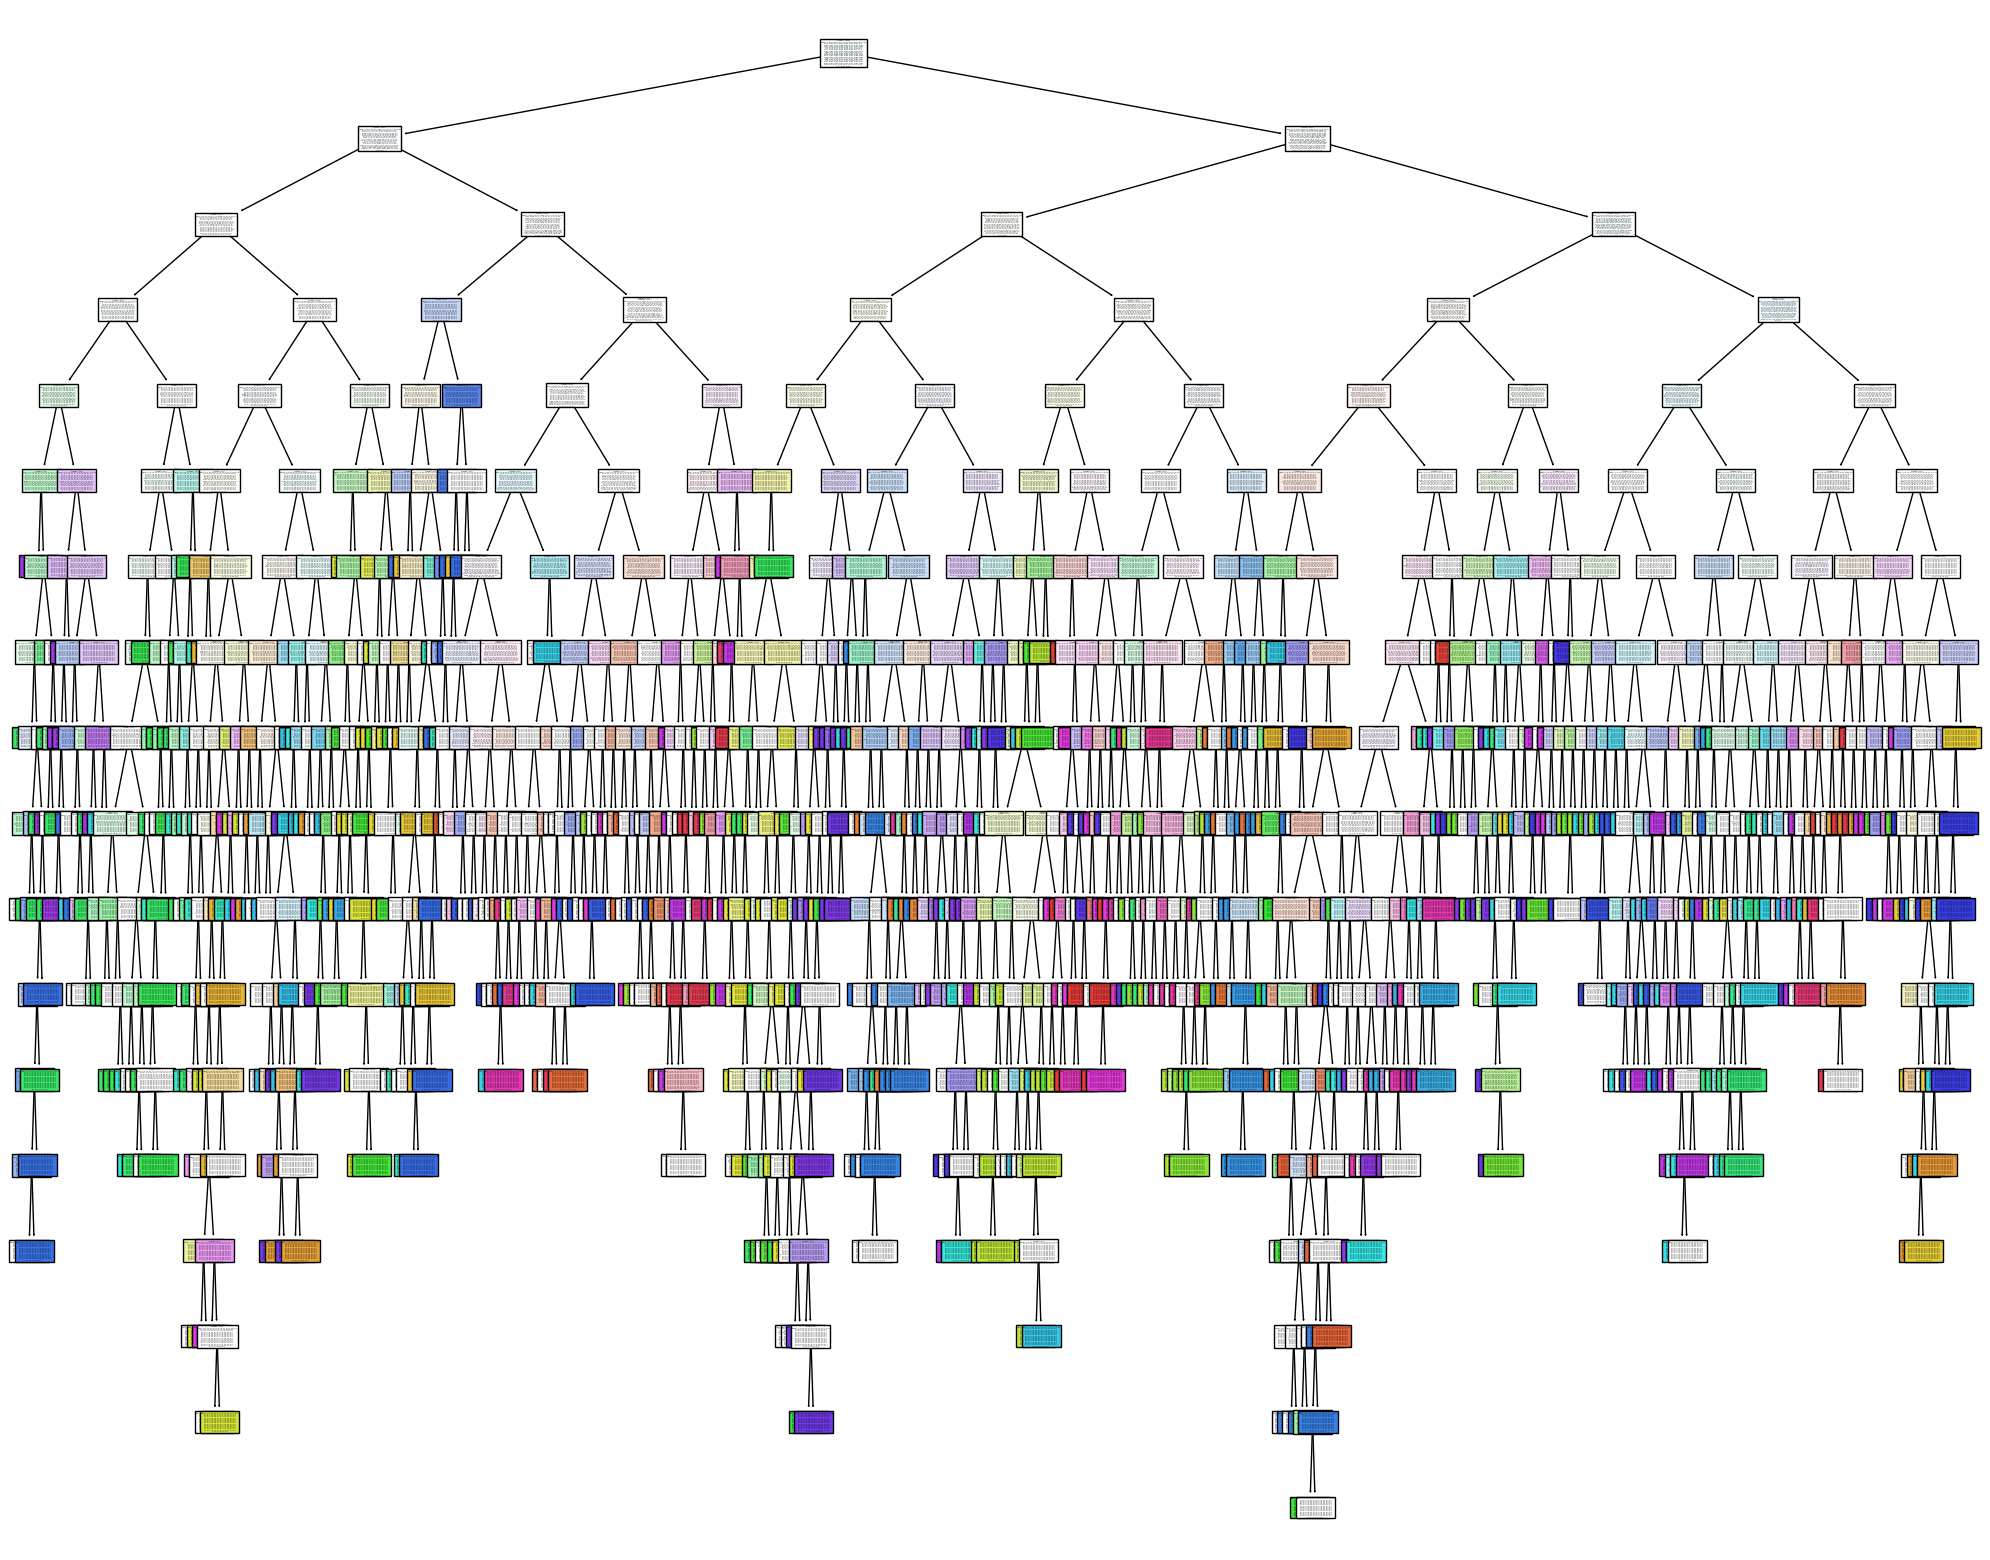

In [644]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
plot_tree(clf, 
          impurity=False,
          proportion=True,
          filled=True, feature_names=feature_col)  
plt.show()

# Random Forest Classification

In [1143]:
clf = RandomForestClassifier(criterion = "gini", max_depth = 8,
                            min_samples_split=10,
                            random_state= 50)

In [1144]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=50)

In [1145]:
clf.feature_importances_

array([0.09757334, 0.08783044, 0.10249909, 0.09041195, 0.29893851,
       0.32274667])

In [1146]:
df.columns

Index(['Age', 'Gender', 'Job', 'Income', 'Relation', 'Event', 'Gift',
       'new_feature'],
      dtype='object')

In [1147]:
y_pred = clf.predict(X_test)

In [1148]:
y_pred

array([77, 61, 77, ..., 93, 92, 63])

In [1149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

27.620504973221117

In [1142]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=10)

C:\Users\nour2\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([0.33587786, 0.29007634, 0.27480916, 0.29770992, 0.26717557,
       0.26717557, 0.29770992, 0.26153846, 0.29230769, 0.29230769])

In [878]:
from sklearn.metrics import classification_report
print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.12      0.25      0.16         8
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.17      0.25      0.20         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       1.00      0.14      0.25         7
           8       0.09      0.33      0.14         6
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         3
          11       0.20      0.14      0.17         7
          12       0.12      0.15      0.14        13
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         4
          15       0.17      0.40      0.24        10
          16       0.00      0.00      0.00         1
          17       0.44    

C:\Users\nour2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nour2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nour2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nour2\anaconda3\Lib\site-packages\sklearn\metrics\_cla

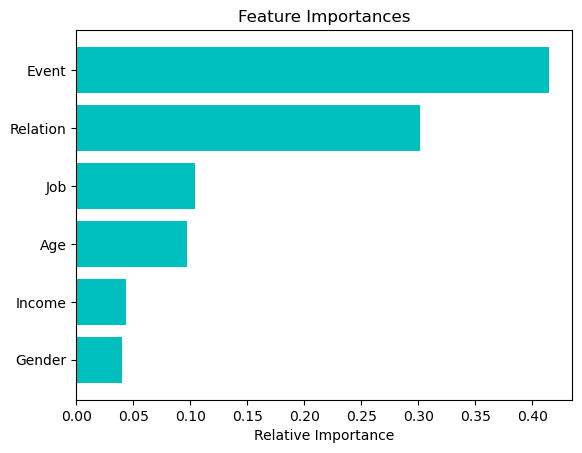

In [877]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='c',align ='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Naive Bayes

In [874]:
model = GaussianNB()

In [875]:
model.fit(X_train,y_train)

GaussianNB()

In [876]:
model.score(X_test,y_test)*100

21.530054644808743